# 탐색적 data 분석  (Exploratory Data Analysis) 실습

## 자동차 가격에 가장 큰 영향을 미치는 특징 파악

In [1]:
import pandas as pd
import numpy as np

 Load data and store in dataframe df:

In [12]:
path = "car_df.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,27,Medium,0,1,1,0,1,0,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,27,Medium,0,1,1,0,1,0,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,26,Medium,0,1,1,0,1,0,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,30,Medium,0,1,1,0,1,0,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,22,Medium,0,1,1,0,1,0,1,0


In [13]:
cols = df.columns[1:]
df = df[cols]
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,Medium,0,1,1,0,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,Medium,0,1,1,0,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,26,Medium,0,1,1,0,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,30,Medium,0,1,1,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,22,Medium,0,1,1,0,1,0,1,0


## 시각화 하여 개별 feature 패턴 분석

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### 올바른 시각화 방법을 선택하는 방법 :
- 개별 변수를 시각화 할 때, 다루는 변수의 유형을 먼저 이해하는 것이 중요


In [5]:
# list the data types for each column
df.dtypes

Unnamed: 0              int64
symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg           float64
price                 float64
city-L/100km          float64
highway-L/100km         int64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-gas           int64
aspiration-std          int64
aspiration-turbo        int64
aspiration-std.1        int64
aspiration

## corr( ) method -  Pearson Correlation

- Pearson Correlation은 두 변수 X와 Y 간의 선형 의존성을 측정합니다.  


- 결과 계수는 -1과 1 사이의 값이며 다음과 같음

    - **1** : 전체 양의 선형 상관 관계,
    - **0** : 선형 상관 관계 없음, 두 변수는 서로 영향을주지 않음
    - **- 1** : 총 음의 선형 상관 관계.
    
    

- "corr"메서드를 사용하여 수치 유형의 변수 간 상관 관계를 계산  

- 대각선 요소는 항상 1 

In [23]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,-0.099157,0.020344,0.121454,-0.121454,-0.082739,0.082739,-0.082739,0.082739,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.066171,0.036233,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.238567,-0.181877,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.476153,-0.543304,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.657373,-0.698142,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.673363,-0.680635,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,0.003811,-0.104812,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.785353,-0.794889,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.745059,-0.679571,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.554610,-0.591309,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816,-0.227816,0.227816


### 관련성 높아 보이는 feature 선정

- 보어, 행정, 압축비 및 마력의 상관 관계

In [7]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


## 연속 수치 변수 (Continuous numerical variables) 

- 연속적인 숫자로 표시되는 변수의 시각화 선이있는 산점도

- 개별 변수와 가격 간의 (선형) 관계를 이해하기 위해, "regplot"을 사용  

- "regplot"은 산점도와 데이터에 대한 적합한 회귀 선을 플롯

### 양의 선형 관계 (positive linear relationship)

- engine-size 와 price 간에는 양의 상관 관계가 존재함을 시각화로 파악

(0, 53530.981741757336)

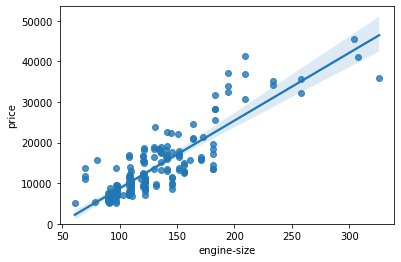

In [9]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

- 엔진 크기가 올라감에 따라 가격이 상승  

- 회귀 직선이 거의 완벽한 대각선이므로 엔진 크기는 가격의 좋은 예측 인자처럼 보임  

- corr() method 로 확인

In [10]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### 음의 상관 관계 (Negative linear relationship)

연비와 가격은 반비례하는 것으로 보이므로 시각화 하여 확인

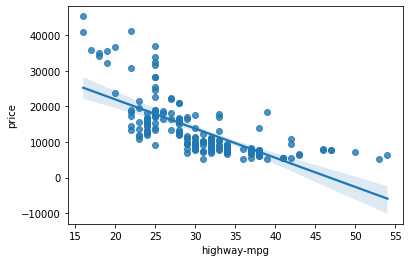

In [11]:
sns.regplot(x="highway-mpg", y="price", data=df)

- 고속도로 연비 (mpg)가 올라감에 따라 가격이 내려감  
- 따라서 연비는 잠재적으로 가격의 예측 변수가 될 수 있음

- corr() method 로 확인

In [12]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### 약한 상관 관계

- 피크시 회전수 "Peak-rpm" 이 price 예측 변수가 될 수 있는지 확인

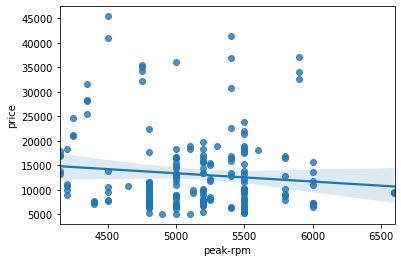

In [13]:
sns.regplot(x="peak-rpm", y="price", data=df)

- 회귀 직선이 수평에 가깝기 때문에 피크 RPM은 가격의 좋은 예측 지표로 보이지 않음  

- corr() method 로 확인

In [14]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## 범주형 변수

- 범주형 변수를 시각화하는 좋은 방법은 상자 그림 (box plot) 을 사용하는 것  

- 차체 style (body-style) 과 가격의 관계를 시각화

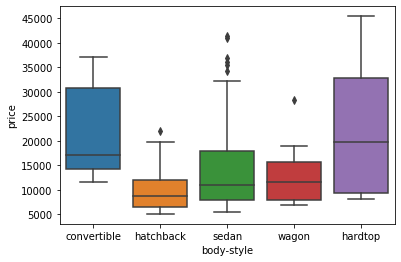

In [15]:
sns.boxplot(x="body-style", y="price", data=df)

-  서로 다른 body style 범주 사이의 가격 분포가 중첩되어 있으므로 body-style 이 가격의 좋은 예측 변수가되지는 않을 것을 알 수 있음

엔진 위치 ("engine-location") 과 "price" 사이의 관계를 시각화

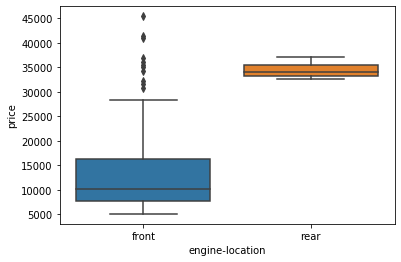

In [17]:
sns.boxplot(x="engine-location", y="price", data=df)

- 엔진 위치 앞과 뒤의 두 엔진 위치 카테고리 사이의 가격 분배가 엔진 위치를 가격의 잠재적인 예측 변수로 사용할 수있을만큼 충분히 명확함

## 기술적 통계 분석(Descriptive Statistical Analysis)

- describe() 함수는 모든 연속 변수에 대한 기본 통계를 자동으로 계산. 모든 NaN 값 skip.

    - 그 변수의 카운트
    - 평균
    - 표준 편차 (표준 편차)
    - 최소치
    - IQR (사분위수 범위 : 25 %, 50 % 및 75 %)
    - 최대치


In [24]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,9.944145,30.686567,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,2.534599,6.815150,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4.795918,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,7.833333,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,9.791667,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,12.368421,34.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,18.076923,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### non-numeric data 포함

In [25]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,115


###  특성 변수의 갯수

In [26]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64